# Titanic Survival Prediction

## Importing Libraries

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import metrics
# ML Algorithms
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

## Adding Dataframes

In [140]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("./train.csv") #load train data
df_train,df_test = train_test_split(df, train_size=0.7,test_size=0.3, random_state=42)

In [141]:
df_train.shape
df_test.shape
train = df_train.copy() # make train data copies
test = df_test.copy() # make test data copies
trainCopy = df_train.copy() # make train data copies
testCopy = df_test.copy() # make test data copies

## Identify Missing Data

In [142]:
total = train.isnull().sum().sort_values(ascending=False)
percent1 = train.isnull().sum()/train.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingData = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingData.head()

,Total,%
Cabin,484,77.7
Age,124,19.9
Embarked,1,0.2
Fare,0,0.0
Ticket,0,0.0


## Identifying Visual Patterns

### Age,Sex vs Survival

/home/contagious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/contagious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/contagious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/contagious/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


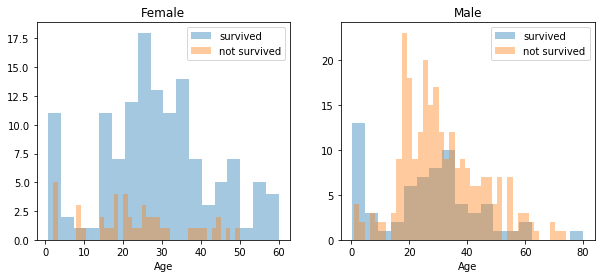

In [143]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

### Embarked, Pclass and Sex:

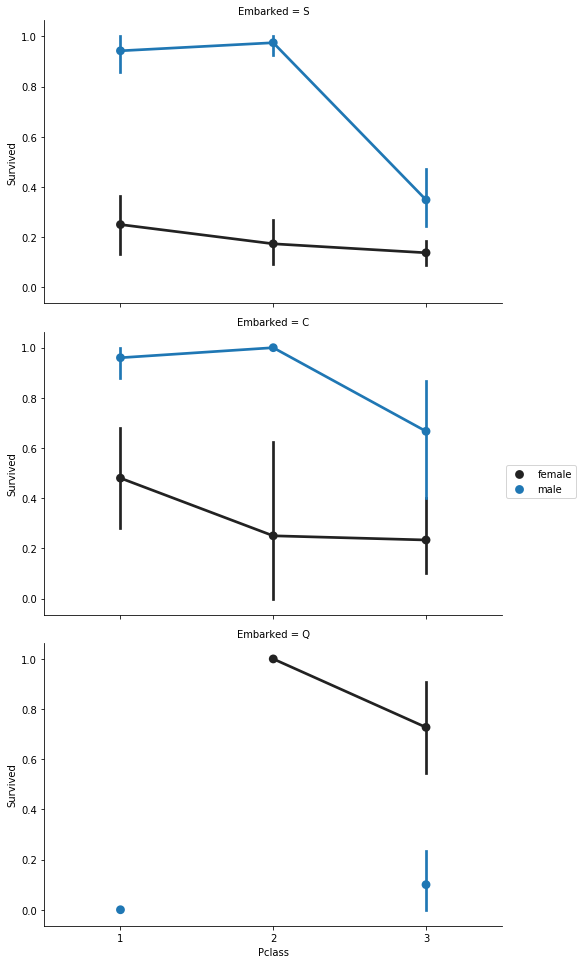

In [144]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Pclass

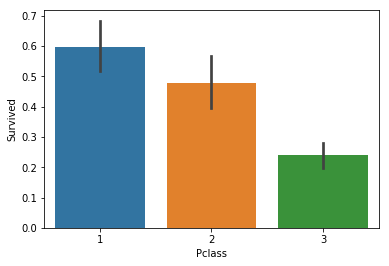

In [145]:
sns.barplot(x='Pclass', y='Survived', data=train)

## Data Preprocessing

### Remove Name/PassengerId Column 


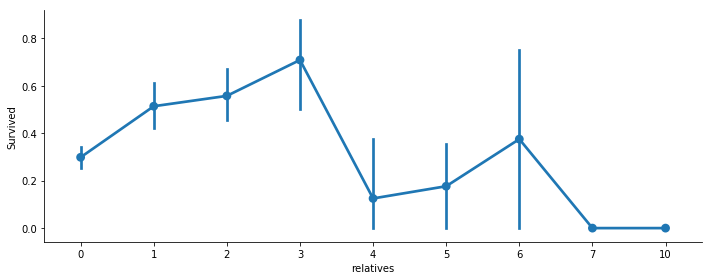

In [146]:

data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

In [147]:
del train['Name']
del test['Name']

### Interprit Cabin to Deck and Replace the feature

In [148]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

### Drop Cabin from both Datasets

In [149]:
del train['Cabin']
del test['Cabin']

In [152]:
test.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
709,710,1,3,male,NaN,1,1,2661,15.2458,C,2,0,8
439,440,0,2,male,31.0,0,0,C.A. 18723,10.5000,S,0,1,8
840,841,0,3,male,20.0,0,0,SOTON/O2 3101287,7.9250,S,0,1,8
720,721,1,2,female,6.0,0,1,248727,33.0000,S,1,0,8
39,40,1,3,female,14.0,1,0,2651,11.2417,C,1,0,8


### Age (Replace NaN using Std & mean values)

In [154]:
data = test

for dataset in data:
    mean = test["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = test["Age"].astype(int)
    #dataset["Age"] = test["Age"].astype(int)
    

TypeError: string indices must be integers

### Embarked (Fill with most common value)

In [ ]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

### Fare (Convert to int64)

In [ ]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Sex/Embarked (Convert to numeric)

In [ ]:

gender_map={'male':1,'female':0}
train['Sex']=train['Sex'].map(gender_map)
test['Sex']=test['Sex'].map(gender_map)
embarked_map={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(embarked_map)
test['Embarked']=test['Embarked'].map(embarked_map)
train.head()

### Ticket (Drop)

In [ ]:
del train['Ticket']
del test['Ticket']

## Creating Categories

### Age

In [ ]:
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
feature_col_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','relatives','not_alone','Deck']
predicted_class_name=['Survived']
X_train= train[feature_col_names].values #predictor feature columns (10 x m)
y_train=train[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)
X_test=test[feature_col_names].values #predictor feature columns (10 x m)
y_test=test[predicted_class_name].values #predicted class (1 = true, 0 = false) column (1 x m)

In [ ]:
test

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier()      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
# training metrics
#print("Training data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

print('Model Performance')
#print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#print('Accuracy = {:0.2f}%.'.format(accuracy))

# training metrics
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))





## Random Forest came up with the accuracy of 82.54% for the TESTING DATA only with data preprocessing and Cross Validation

## Implementing Optimization

### Examine default RF to determine parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object

rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train.ravel());

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object

rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))

from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 598, stop = 602, num = 6)]
# Number of features to consider at every split
max_features = [ 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 7, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [4,5,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
p_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


rf_grid = GridSearchCV(estimator=rf_model,param_grid=p_grid,
                               scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2,  n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_grid.fit(X_train, y_train.ravel());
rf_grid.best_params_

In [ ]:
rf_grid.best_params_

In [ ]:
max_depth = [int(x) for x in np.linspace(15, 20, num = 6)]
max_depth

In [ ]:
rf_grid.best_params_

In [ ]:
best_grid = rf_grid.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)

rf_predict_train = best_random.predict(X_train)
rf_predict_test = best_random.predict(X_test)

# training metrics
haccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(haccuracy))


## Evaluate Function

### Evaluate the default model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf_model = RandomForestClassifier(n_estimators= 1000,random_state=0)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
# training metrics
#print("Training data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

# training metrics
baccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(baccuracy))


In [ ]:
best_random = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, X_test, y_test)

rf_predict_train = best_random.predict(X_train)
rf_predict_test = best_random.predict(X_test)

# training metrics
haccuracy=metrics.accuracy_score(y_test, rf_predict_test)
print("Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("Test data Accuracy: {0:.4f}".format(haccuracy))


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (haccuracy - baccuracy) / baccuracy))

## Graphical Representation on hyperparameter variation

### n_estimators

In [ ]:
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200,500,1000,2000]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, 'b', label='Train')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
min_samples_leaf = [1,2,3,4,5]
train_results = []
test_results = []
for min_samples_l in min_samples_leaf:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_l, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_aucA = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_aucA)
    y_pred = rf.predict(X_test)
    false_positive_rateA, true_positive_rateA, thresholds = roc_curve(y_test, y_pred)
    roc_aucB = auc(false_positive_rateA, true_positive_rateA)
    test_results.append(roc_aucB)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Sample Leaf')
plt.show()

In [ ]:
min_samples_leaf = np.linspace(1,5,1)
min_samples_leaf